# The Toll of Atomic Bombs

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00450161&tstat=000001089035&cycle=8&tclass1=000001097755

https://www.mhlw.go.jp/toukei/list/88-1b.html#kekka


REPORT:

https://www.mhlw.go.jp/toukei/list/dl/88-1b-02.pdf


https://www.pri.org/stories/2017-11-17/how-other-countries-can-help-us-understand-americas-mass-shooting-crisis


http://www.storybench.org/how-pris-the-world-conveyed-the-death-toll-of-mass-shootings-using-sound/

In [2]:
import pandas as pd
import re
import numpy as np

import math
import statistics

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
hibakusha = pd.read_csv('data/hibakusha_cleaned.csv')
hibakusha.head(1)

,year_japan,total
0,昭和20年,NaN


In [4]:
years = pd.read_csv('data/years_conversion.csv')

In [5]:
hibakusha = hibakusha.merge(years, on='year_japan')

In [8]:
hibakusha.head(30)

,year_japan,total,year
0,昭和20年,NaN,1945
1,昭和21年,0.0,1946
2,昭和22年,0.0,1947
3,昭和23年,0.0,1948
4,昭和24年,0.0,1949
5,昭和25年,0.0,1950
6,昭和26年,0.0,1951
7,昭和27年,0.0,1952
8,昭和28年,0.0,1953
9,昭和29年,0.0,1954


In [33]:
hibakusha.sort_values('total', ascending=False).head(3)

,year_japan,total,year
35,55年,372264,1980
37,57年,372179,1982
36,56年,372140,1981


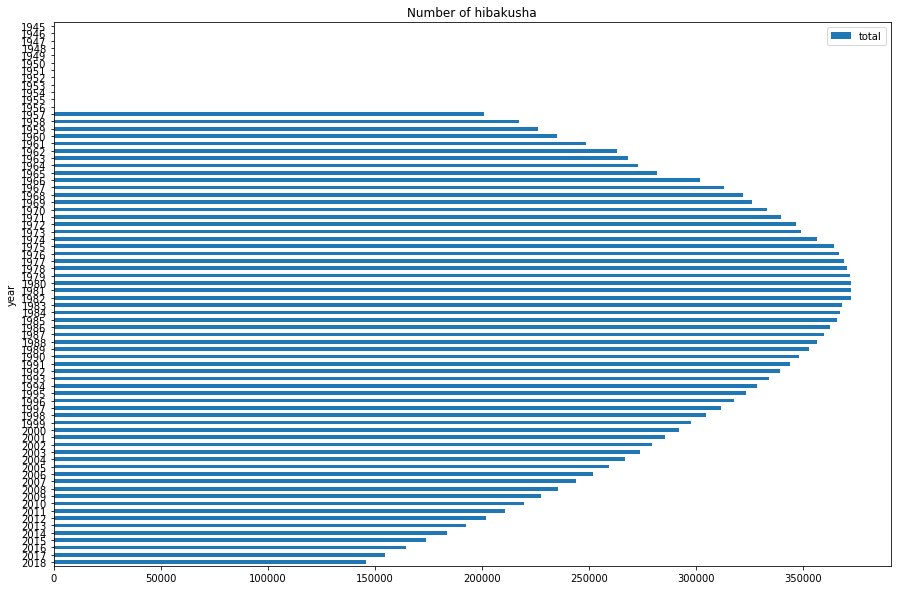

In [15]:
hibakusha.sort_index(ascending=False).plot(kind='bar', 
                          x='year',
                          y='total',
                          title='Number of hibakusha',
                         figsize=(15,10))

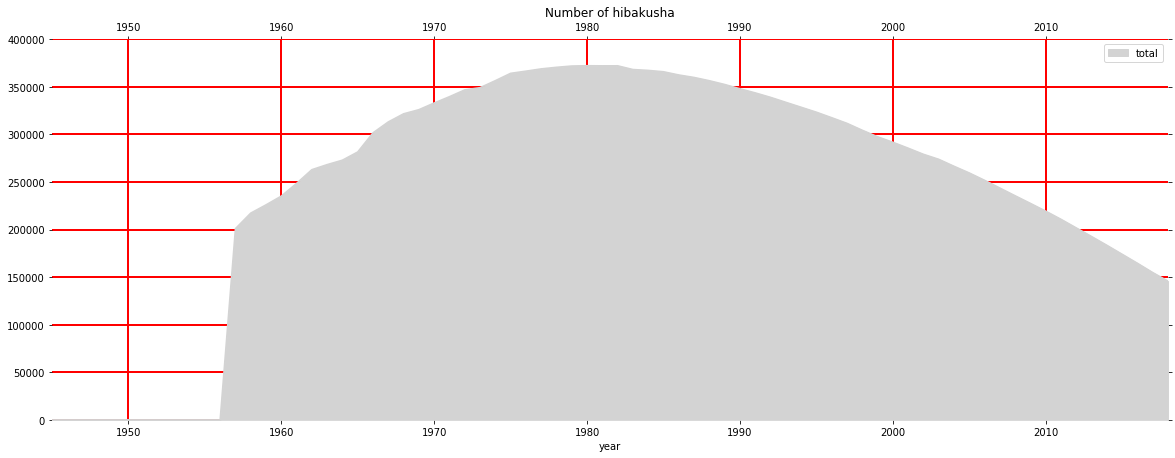

In [28]:
ax = hibakusha.plot(kind='area',
                          x='year',
                          y='total',
                          title='Number of hibakusha',
                          color='lightgrey',
                         figsize=(20,7))

ax.set_ylabel("")

# When plotting the grid, you can send it options!
ax.grid(color='r', linestyle='-', linewidth=2)

ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top='off',   # ticks along the top edge are off
    left='off', # ticks along the right edge are off
    right='off', # ticks along the right edge are off
    bottom='off', # ticks along the bottom edge are on
    labeltop='on', # top label is on
    labelbottom='on')  # bottom label is on

ax.set_xlim((1945,2018))
ax.set_ylim((0,400000))
plt.savefig("charts/hibakusha-total-vert.pdf",  bbox_inches='tight')

# Merge population data on the hibakusha dataframe

In [ ]:
pop = pd.read_csv('data/japan_population_cleaned.csv')

In [ ]:
hibakusha = hibakusha.merge(pop, on='year', how='left')

In [ ]:
hibakusha.head(1)

## Stacked bar chart of hibakusha vs Japan population

In [ ]:
hibakusha.plot(kind='barh', x='year', y=['total', 'total_pop'], stacked=True, width=0.8)

## Make a PCT stacked barchart

In [ ]:
hibakusha['pct_hibakusha'] = hibakusha.total / hibakusha.total_pop

In [ ]:
hibakusha['pct_other'] = 1 - hibakusha.pct_hibakusha

In [ ]:
hibakusha.plot(x='year',
        y=['pct_hibakusha', 'pct_other'],
        kind='barh',
        stacked=True,
        figsize = (6,10),
        width=0.8)

In [ ]:
types = pd.read_csv('data/hibakusha_2019_types_cleaned.csv')
types

In [ ]:
types.plot.pie(y='total', title='Hibakusha type, most recent')

plt.savefig("charts/hibakusha-types-pie.pdf",  bbox_inches='tight')

# Take a look at the region breakdown of the current hibakusha

In [ ]:
regions = pd.read_csv('data/hibakusha_2019_prefectures_cleaned.csv')
regions.total.sum()

In [ ]:
select = pd.read_csv('data/hibakusha_2019_select_regions.csv')

In [ ]:
select.total.sum()

In [ ]:
select['pct'] = select.total / select.total.sum()

In [ ]:
select

In [ ]:
select.plot.pie(y='total', title='Hibakusha by region, most recent')

plt.savefig("charts/hibakusha-region-pie.pdf",  bbox_inches='tight')

# Make a pct barchart of hibakusha vs prefecture population

In [ ]:
select['pct_hibakusha_pref'] = select.total/select.pref_population
select['pct_not_hibakusha_pref'] = 1 - select.total/select.pref_population

In [ ]:
select.head(1)

In [ ]:
select.plot(x='pref_eng',
        y=['pct_hibakusha_pref', 'pct_not_hibakusha_pref'],
        kind='barh',
        stacked=True,
        figsize = (6,4),
        width=0.8)